## PMC de regresion

Un Perceptrón Multicapa es una red neuronal feedforward que mediante “backpropagation" ajusta pesos y sesgos para minimizar una función de error, sustancialmente el Error Cuadrático Medio (MSE) en tareas de regresión [1]. Se emplea frecuentemente en informática médica para tareas de pronóstico porque su capacidad para aproximar mapeos no lineales supera a los modelos lineales bajo relaciones biomédicas complejas” [2]

## Dataset:
El Dataset utiizado es uno libre de scikit-learn, un conjunto de datos de diabetes de pacientes en UCI utilizado para evaluar técnicas de regresión.
Caracteristicas del dataset tiene una muestra de 442 pacientes evaluados de los cuales se tomo su edad, sexo, IMC, presion arteial, etc [3].


In [13]:
from sklearn.datasets import load_diabetes
import pandas as pd

data = load_diabetes()
X = data.data
y = data.target

print(X.shape[0])
print(X.shape[1])
print(data.feature_names)

442
10
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [14]:
df = pd.DataFrame(X, columns=data.feature_names)
df["target"] = y

print(df.head())
print(df.describe())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-0

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Train", X_train.shape[0])
print("Test", X_test.shape[0])

Train 353
Test 89


### Escalamiento

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Entrenamiento

In [7]:
arquitecturas = {
    "1 capa (50 neuronas)":       (50,),
    "2 capas (100, 50 neuronas)": (100, 50),
}

In [16]:
import time
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

resultados = []  # Lista para guardar resultados

for nombre, capas in arquitecturas.items():
    # Configurar el modelo
    modelo = MLPRegressor(
        hidden_layer_sizes=capas,
        max_iter=500,
        tol=1e-4,
        random_state=42
    )

    modelo.fit(X_train_scaled, y_train)
    y_pred = modelo.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    r2  = r2_score(y_test, y_pred)

    resultados.append({
        "Arquitectura":              nombre,
        "MSE":                       round(mse, 3),
        "R²":                        round(r2, 3)
    })

import pandas as pd
df_resultados = pd.DataFrame(resultados)
print(df_resultados)


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


                 Arquitectura       MSE     R²
0        1 capa (50 neuronas)  5801.789 -0.095
1  2 capas (100, 50 neuronas)  2743.829  0.482


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


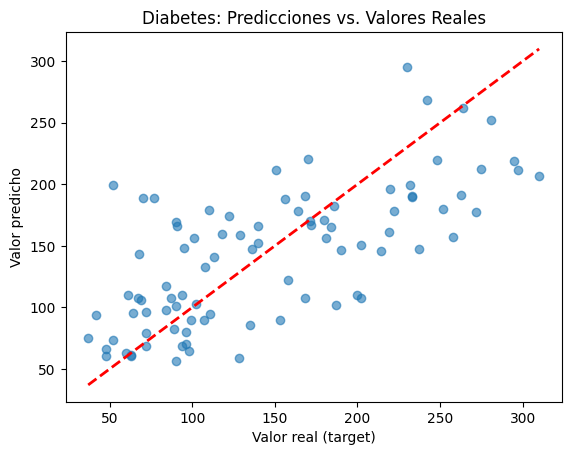

In [17]:
import matplotlib.pyplot as plt

modelo_mejor = MLPRegressor(
    hidden_layer_sizes=arquitecturas["2 capas (100, 50 neuronas)"],
    max_iter=500,
    tol=1e-4,
    random_state=42
)
modelo_mejor.fit(X_train_scaled, y_train)
y_pred_mejor = modelo_mejor.predict(X_test_scaled)

plt.scatter(y_test, y_pred_mejor, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', linewidth=2)
plt.xlabel("Valor real (target)")
plt.ylabel("Valor predicho")
plt.title("Diabetes: Predicciones vs. Valores Reales")
plt.show()


**Reference:**

[1] F. Widyahastuti y VU Tjhin, “Predicción del rendimiento de los estudiantes en el examen final utilizando regresión lineal y perceptrón multicapa”, preimpresión, febrero de 2017.

[2] D. Lamba, WH Hsu y M. Alsadhan, “Predictive Analytics and Machine Learning for Medical Informatics: A Survey of Tasks and Techniques”, preimpresión, Universidad Estatal de Kansas, feb. 2021.

[3] F. Pedregosa et al. , “Scikit-learn: aprendizaje automático en Python”, Journal of Machine Learning Research , vol. 12, págs. 2825–2830, 2011.